In [ ]:
# ALL imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm

---

## 1. Introduction

We explored data that identified key metrics in gauging the happiness of the global population from the years 2005-2016.

When looking at this dataset, we came to an overarching question: How do the different observations obtained from this study contribute to the variations in global happiness scores? How are they interconnected?

To answer this, we needed to ask a few deeper questions about the different components of the happiness scores to paint a more in-depth understanding of the overarching question at hand.


### Questions to Ask

1. Does freedom to make life choices correlate to a higher level of confidence in national government?
2. How do the results from comparing freedom to make life choices and the level of confidence in a national government differ when comparing a democratic country like the United States and a monarchy like the United Kingdom?
2. Were people more or less happy throughout the course of this study?
3. Is there an observable correlation between average GDP per capita and perceived happiness (life ladder) for countries that are in North America versus Asia?
4. As GDP per capita increases, does healthy life expectancy at birth increase as well?


---

## 2. Data

A direct link to the data can be found at the following website.
 * https://data.world/laurel/world-happiness-report-data/workspace/file?filename=online-data-chapter-2-whr-2017.xlsx

This World Happiness Report was collected via surveys conducted by government organizations similar in function to the United States Census Bureau throughout the world from the years of 2005 to 2016. The report measured countries on a point system for various qualities of life including life ladder, social support, trustworthiness of others, life expectancy, perceptions of corruption, etc.

In [ ]:
#importing the data from github
world = pd.read_csv("https://raw.githubusercontent.com/GoodGuyMomo/CS-280-Final-Project/main/happy_data.csv")
world

,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Zimbabwe,Zimbabwe,2012,4.955101,7.407775,0.896476,45.319149,0.469531,-0.059864,0.858691,...,NaN,NaN,0.487203,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1416,Zimbabwe,Zimbabwe,2013,4.690188,7.429061,0.799274,47.000294,0.575884,-0.062995,0.830937,...,NaN,NaN,0.555439,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1417,Zimbabwe,Zimbabwe,2014,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,...,NaN,NaN,0.601080,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1418,Zimbabwe,Zimbabwe,2015,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,...,NaN,NaN,0.655137,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942


Cleaning up the dataframe:

In [ ]:
#Rename the columns and clear out unnecessary columns
columns_to_remove = ['WP5 Country',
                     'GINI index (World Bank estimate)',
                     'GINI index (World Bank estimate), average 2000-13',
                     'gini of household income reported in Gallup, by wp5-year',
                     'Most people can be trusted, WVS round 1981-1984',
                     'Most people can be trusted, WVS round 1989-1993',
                     'Most people can be trusted, WVS round 1994-1998',
                     'Most people can be trusted, WVS round 1999-2004',
                     'Most people can be trusted, WVS round 2005-2009',
                     'Most people can be trusted, WVS round 2010-2014']

# Remove multiple columns from the DataFrame
new_world = world.drop(columns=columns_to_remove)

#Rename some columns for clarity
new_world.rename(columns={'Life Ladder':'life_ladder',
                          'Log GDP per capita': 'gdp_per_capita',
                          'Social support':'social_support',
                          'Healthy life expectancy at birth':'life_expectancy_at_birth',
                          'Freedom to make life choices':'freedom_life_choices',
                          'Generosity':'generosity',
                          'Perceptions of corruption':'corruption_perception',
                          'Positive affect':'positive_affect',
                          'Negative affect':'negative_affect',
                          'Confidence in national government':'confidence_in_government',
                          'Democratic Quality':'democratic_quality',
                          'Delivery Quality':'delivery_quality',
                          'Standard deviation of ladder by country-year':'standard_deviation_of_ladder_per_country_year',
                          'Standard deviation/Mean of ladder by country-year':'standard_deviation_mean_of_ladder_per_country_year',
                         'Most people can be trusted, Gallup': 'trustworthiness_of_others'},
                         inplace = True)
new_world

,country,year,life_ladder,gdp_per_capita,social_support,life_expectancy_at_birth,freedom_life_choices,generosity,corruption_perception,positive_affect,negative_affect,confidence_in_government,democratic_quality,delivery_quality,standard_deviation_of_ladder_per_country_year,standard_deviation_mean_of_ladder_per_country_year,trustworthiness_of_others
0,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,0.517637,0.258195,0.612072,-1.962724,-1.665877,1.774662,0.476600,NaN
1,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,0.583926,0.237092,0.611545,-2.082451,-1.647945,1.722688,0.391362,0.286315
2,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,0.618265,0.275324,0.299357,-2.015700,-1.630097,1.878622,0.394803,0.275833
3,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,0.611387,0.267175,0.307386,-1.943686,-1.620443,1.785360,0.465942,NaN
4,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,0.710385,0.267919,0.435440,-1.855898,-1.435541,1.798283,0.475367,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Zimbabwe,2012,4.955101,7.407775,0.896476,45.319149,0.469531,-0.059864,0.858691,0.669279,0.177311,0.407084,-1.117682,-1.477044,1.853195,0.373997,NaN
1416,Zimbabwe,2013,4.690188,7.429061,0.799274,47.000294,0.575884,-0.062995,0.830937,0.711885,0.182288,0.527755,-1.031373,-1.471021,1.964805,0.418918,NaN
1417,Zimbabwe,2014,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,0.725214,0.239111,0.566209,-0.962947,-1.468772,2.079248,0.496899,NaN
1418,Zimbabwe,2015,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,0.715079,0.178861,0.590012,NaN,NaN,2.198865,0.593776,NaN


Adding continents to each country:

In [ ]:
#Assign a continent to each country
continents = {'Afghanistan': "Asia", 'Albania': "Europe", 'Algeria': "Africa", 'Angola': "Africa", 'Argentina': "South America",
       'Armenia': "Asia", 'Australia': "Australia", 'Austria': "Europe", 'Azerbaijan': "Asia", 'Bahrain': "Asia",
       'Bangladesh': "Asia", 'Belarus': "Europe", 'Belgium': "Europe", 'Belize': "North America", 'Benin': "Africa", 'Bhutan': "Asia",
       'Bolivia': "South America", 'Bosnia and Herzegovina': "Europe", 'Botswana': "Africa", 'Brazil': "South America",
       'Bulgaria': "Europe", 'Burkina Faso': "Africa", 'Burundi': "Africa", 'Cambodia': "Asia", 'Cameroon': "Africa",
       'Canada': "North America", 'Central African Republic': "Africa", 'Chad': "Africa", 'Chile': "South America", 'China': "Asia",
       'Colombia': "South America", 'Comoros': "Africa", 'Congo (Brazzaville)': "Africa", 'Congo (Kinshasa)': "Africa",
       'Costa Rica': "North America", 'Croatia': "Europe", 'Cuba': "North America", 'Cyprus': "Asia", 'Czech Republic': "Europe",
       'Denmark': "Europe", 'Djibouti': "Africa", 'Dominican Republic': "North America", 'Ecuador': "South America", 'Egypt': "Africa",
       'El Salvador': "North America", 'Estonia': "Europe", 'Ethiopia': "Africa", 'Finland': "Europe", 'France': "Europe", 'Gabon': "Africa",
       'Georgia': "Europe", 'Germany': "Europe", 'Ghana': "Africa", 'Greece': "Europe", 'Guatemala': "North America", 'Guinea': "Africa",
       'Guyana': "South America", 'Haiti': "North America", 'Honduras': "North America", 'Hong Kong': "Asia", 'Hungary': "Europe", 'Iceland': "Europe",
       'India': "Asia", 'Indonesia': "Asia", 'Iran': "Asia", 'Iraq': "Asia", 'Ireland': "Europe", 'Israel': "Asia", 'Italy': "Europe",
       'Ivory Coast': "Africa", 'Jamaica': "North America", 'Japan': "Asia", 'Jordan': "Asia", 'Kazakhstan': "Asia", 'Kenya': "Africa",
       'Kosovo': "Europe", 'Kuwait': "Asia", 'Kyrgyzstan': "Asia", 'Laos': "Asia", 'Latvia': "Europe", 'Lebanon': "Asia",
       'Lesotho': "Africa", 'Liberia': "Africa", 'Libya': "Africa", 'Lithuania': "Europe", 'Luxembourg': "Europe",
       'Macedonia': "Europe", 'Madagascar': "Africa", 'Malawi': "Africa", 'Malaysia': "Asia", 'Mali': "Africa", 'Malta': "Europe",
       'Mauritania': "Africa", 'Mauritius': "Africa", 'Mexico': "North America", 'Moldova': "Europe", 'Mongolia': "Asia",
       'Montenegro': "Europe", 'Morocco': "Africa", 'Mozambique': "Africa", 'Myanmar': "Asia", 'Namibia': "Africa",
       'Nepal': "Asia", 'Netherlands': "Europe", 'New Zealand': "Australia", 'Nicaragua': "North America", 'Niger': "Africa",
       'Nigeria': "Africa", 'North Cyprus': "Asia", 'Norway': "Europe", 'Oman': "Asia", 'Pakistan': "Asia",
       'Palestinian Territories': "Asia", 'Panama': "North America", 'Paraguay': "South America", 'Peru': "South America",
       'Philippines': "Asia", 'Poland': "Europe", 'Portugal': "Europe", 'Qatar': "Asia", 'Romania': "Europe", 'Russia': "Asia",
       'Rwanda': "Africa", 'Saudi Arabia': "Asia", 'Senegal': "Africa", 'Serbia': "Europe", 'Sierra Leone': "Africa",
       'Singapore': "Asia", 'Slovakia': "Europe", 'Slovenia': "Europe", 'Somalia': "Africa",
       'Somaliland region': "Africa", 'South Africa': "Africa", 'South Korea': "Asia", 'South Sudan': "Africa",
       'Spain': "Europe", 'Sri Lanka': "Asia", 'Sudan': "Africa", 'Suriname': "South America", 'Swaziland': "Africa", 'Sweden': "Europe",
       'Switzerland': "Europe", 'Syria': "Asia", 'Taiwan': "Asia", 'Tajikistan': "Asia", 'Tanzania': "Africa",
       'Thailand': "Asia", 'Togo': "Africa", 'Trinidad and Tobago': "North America", 'Tunisia': "Africa", 'Turkey': "Europe",
       'Turkmenistan': "Asia", 'Uganda': "Africa", 'Ukraine': "Europe", 'United Arab Emirates': "Asia",
       'United Kingdom': "Europe", 'United States': "North America", 'Uruguay': "South America", 'Uzbekistan': "Asia",
       'Venezuela': "South America", 'Vietnam': "Asia", 'Yemen': "Asia", 'Zambia': "Africa", 'Zimbabwe': "Africa"}
new_world["continent"] = new_world["country"].map(continents)
new_world

,country,year,life_ladder,gdp_per_capita,social_support,life_expectancy_at_birth,freedom_life_choices,generosity,corruption_perception,positive_affect,negative_affect,confidence_in_government,democratic_quality,delivery_quality,standard_deviation_of_ladder_per_country_year,standard_deviation_mean_of_ladder_per_country_year,trustworthiness_of_others,continent
0,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,0.517637,0.258195,0.612072,-1.962724,-1.665877,1.774662,0.476600,NaN,Asia
1,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,0.583926,0.237092,0.611545,-2.082451,-1.647945,1.722688,0.391362,0.286315,Asia
2,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,0.618265,0.275324,0.299357,-2.015700,-1.630097,1.878622,0.394803,0.275833,Asia
3,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,0.611387,0.267175,0.307386,-1.943686,-1.620443,1.785360,0.465942,NaN,Asia
4,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,0.710385,0.267919,0.435440,-1.855898,-1.435541,1.798283,0.475367,NaN,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Zimbabwe,2012,4.955101,7.407775,0.896476,45.319149,0.469531,-0.059864,0.858691,0.669279,0.177311,0.407084,-1.117682,-1.477044,1.853195,0.373997,NaN,Africa
1416,Zimbabwe,2013,4.690188,7.429061,0.799274,47.000294,0.575884,-0.062995,0.830937,0.711885,0.182288,0.527755,-1.031373,-1.471021,1.964805,0.418918,NaN,Africa
1417,Zimbabwe,2014,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,0.725214,0.239111,0.566209,-0.962947,-1.468772,2.079248,0.496899,NaN,Africa
1418,Zimbabwe,2015,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,0.715079,0.178861,0.590012,NaN,NaN,2.198865,0.593776,NaN,Africa


### Summary of Variables within the World Happiness Table

The "new_world" table has 17 columns/variables and 1420 rows. The original dataset had 27 columns, but we decided to remove certain columns either because they were redundant or irrelevant to the purpose of this study. We will now explain each variable, giving their units, indicating their types, and providing some descriptive statistics if necessary.

**There are 2 categorical variables**
        
* **country** – Country name
    * Number of missing values: 0
    * Contains 164 distinct values:
        *   Afghanistan, Albania, Algeria, Angola, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahrain

* **year** – Year
    * Number of missing values: 0
    * Contains 12 distinct values:
        *   2005-2016
        
**There are 15 numerical variables**

* **life_ladder** – average score that represents one's own position in life on a scale of 1 to 10, with 10 being the best and 1 being the worst
    * Number of missing values: 0
    * max value: 8.018934
    * min value: 2.687553
    * average value: 5.428571

* **gdp_per_capita** – average GDP per capita in purchasing power parity at constant 2011 international dollar prices
    * Number of missing values: 35
    * max value: 11.815410
    * min value: 6.354652
    * average value: 9.203860
    
* **social_support** – National average response to the question of whether or not they have support from others when times are tough
    * Number of missing values: 12
    * max value: 0.987343
    * min value: 0.290184
    * average value: 0.811142

* **life_expectancy_at_birth** – average score of healthy life expectancy at birth
    * Number of missing values: 9
    * max value: 76.408699
    * min value: 36.167667
    * average value: 61.965278

* **freedom_life_choices** – average response to the question, “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?"
    * Number of missing values: 34
    * max value: 0.983803
    * min value: 0.257534
    * average value: 0.723822

* **generosity** – average response to the question, “Have you donated money to a charity in the past month?”

    * Number of missing values: 92
    * max value: 0.542249
    * min value: -0.324367
    * average value: 0.000201
    
* **corruption_perception** – average response to the question, “Is corruption widespread throughout the government, businesses, etc.”
    * Number of missing values: 84
    * max value: 0.983276
    * min value: 0.035198
    * average value: 0.755678
    
* **positive_affect** – average score of three positive affect measures in GWP: happiness, laugh, and enjoyment in the Gallup World Poll
    * Number of missing values: 17
    * max value: 0.943621
    * min value: 0.362498
    * average value: 0.709873
    
* **negative_affect** – average score of three negative affect measures in GWP: worry, sadness, and anger
    * Number of missing values: 11
    * max value: 0.704590
    * min value: 0.083426
    * average value: 0.260295
    
* **confidence_in_government** – average response to a yes or no question of "Do you have confidence in your national government?"
    * Number of missing values: 195
    * max value: 0.979501
    * min value: 0.068769
    * average value: 0.464820    

* **democratic_quality** – average score of a 0-1 rating based on six dimensions: Voice and Accountability, Political Stability and Absence of Violence, Government Effectiveness, Regulatory Quality, Rule of Law, Control of Corruption.
    * Number of missing values: 292
    * max value: 1.538103
    * min value: -2.310710
    * average value: -0.143355
    
* **delivery_quality** – average score of a 0-1 rating based on six dimensions: Voice and Accountability, Political Stability and Absence of Violence, Government Effectiveness, Regulatory Quality, Rule of Law, Control of Corruption
    * Number of missing values: 291
    * max value: 2.200550
    * min value: -2.167530
    * average value: -0.002564   

* **standard_deviation_of_ladder_per_country_year** – average standard deviation of life ladder per country and year
    * Number of missing values: 0
    * max value: 3.527820
    * min value: 0.863034
    * average value: 1.983658  

* **standard_deviation_mean_of_ladder_per_country_year** – average standard deviation and mean combined together for life ladder per country and year
    * Number of missing values: 0
    * max value: 1.022769
    * min value: 0.133908
    * average value: 0.383186  

* **trustworthiness_of_others** – Average response to the question, “Generally speaking, would you say that most people can be trusted or that you have to be careful..."
    * Number of missing values: 1240
    * max value: 0.640332
    * min value: 0.066618
    * average value: 0.226295  

### Code Used to Summarize Variables

In this section, we include the code used to describe the variables in the previous section.

In [ ]:
#Descriptive stats for all columns in the dataframe
new_world.describe()

,year,life_ladder,gdp_per_capita,social_support,life_expectancy_at_birth,freedom_life_choices,generosity,corruption_perception,positive_affect,negative_affect,confidence_in_government,democratic_quality,delivery_quality,standard_deviation_of_ladder_per_country_year,standard_deviation_mean_of_ladder_per_country_year,trustworthiness_of_others
count,1420.000000,1420.000000,1385.000000,1408.000000,1411.000000,1386.000000,1328.000000,1336.000000,1403.000000,1409.000000,1225.000000,1128.000000,1129.000000,1420.000000,1420.000000,180.000000
mean,2011.303521,5.428571,9.203860,0.811142,61.965278,0.723822,0.000201,0.755678,0.709873,0.260295,0.464820,-0.143355,-0.002564,1.983658,0.383186,0.226295
std,3.149570,1.121719,1.183485,0.119286,8.198405,0.146490,0.159385,0.186446,0.107631,0.082701,0.178399,0.865859,0.961750,0.366721,0.114287,0.119079
min,2005.000000,2.687553,6.354652,0.290184,36.167667,0.257534,-0.324367,0.035198,0.362498,0.083426,0.068769,-2.310710,-2.167530,0.863034,0.133908,0.066618
25%,2009.000000,4.600384,8.306463,0.750623,57.029228,0.629931,-0.110767,0.698339,0.622200,0.202129,0.328487,-0.800332,-0.705457,1.732018,0.309646,0.139773
50%,2011.000000,5.317440,9.378672,0.833718,63.782501,0.739609,-0.017912,0.810556,0.717980,0.249856,0.453570,-0.252632,-0.227479,1.948063,0.367580,0.198450
75%,2014.000000,6.269866,10.159828,0.904155,67.936405,0.838298,0.092981,0.882902,0.802945,0.307471,0.592506,0.649054,0.671737,2.191734,0.445621,0.281627
max,2016.000000,8.018934,11.815410,0.987343,76.408699,0.983803,0.542249,0.983276,0.943621,0.704590,0.979501,1.538103,2.200550,3.527820,1.022769,0.640332


This code is to count the number of *missing* values for each variable/column in the dataframe.

In [ ]:
#Produce the number of NaN values from each variable
nan_counts = new_world.isna().sum()
print(nan_counts)

country                                                  0
year                                                     0
life_ladder                                              0
gdp_per_capita                                          35
social_support                                          12
life_expectancy_at_birth                                 9
freedom_life_choices                                    34
generosity                                              92
corruption_perception                                   84
positive_affect                                         17
negative_affect                                         11
confidence_in_government                               195
democratic_quality                                     292
delivery_quality                                       291
standard_deviation_of_ladder_per_country_year            0
standard_deviation_mean_of_ladder_per_country_year       0
trustworthiness_of_others                             12

This code is to count the number of *unique* values for each variable/column in the dataframe.

In [ ]:
# Count unique values for each column
unique_counts = new_world.nunique()
print(unique_counts)

country                                                164
year                                                    12
life_ladder                                           1420
gdp_per_capita                                        1385
social_support                                        1408
life_expectancy_at_birth                              1366
freedom_life_choices                                  1386
generosity                                            1328
corruption_perception                                 1336
positive_affect                                       1403
negative_affect                                       1409
confidence_in_government                              1225
democratic_quality                                    1128
delivery_quality                                      1129
standard_deviation_of_ladder_per_country_year         1420
standard_deviation_mean_of_ladder_per_country_year    1419
trustworthiness_of_others                              1

After organizing our data, we wanted to start off by asking our first question from the data which was...

---
## Does freedom to make life choices correlate to a higher level of confidence in national government?

One of the more pertinent assumptions we made was that socioeconomic turmoil was at a steady increase. As political conflicts grew, so did public opinions regarding their trust in governments and their perceived sense of freedom.

In [ ]:
#Grab the mean (for all continents) responses for the questions:
#"Freedom to make life choices" and "Confidence in national government"

continent_grouped = new_world.groupby("continent")
freedom_confidence_continent = continent_grouped[["freedom_life_choices", "confidence_in_government"]].mean().reset_index()
freedom_confidence_continent

,continent,freedom_life_choices,confidence_in_government
0,Africa,0.676701,0.532501
1,Asia,0.726700,0.532256
2,Australia,0.922783,0.552348
3,Europe,0.723263,0.387837
4,North America,0.774189,0.400598
5,South America,0.762888,0.415182


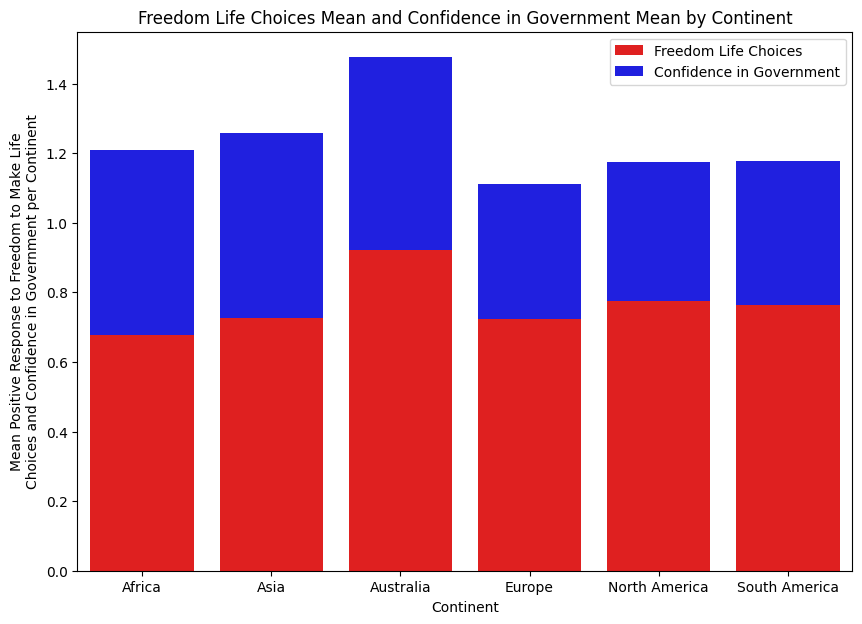

In [ ]:
#Plot a barplot from the dataframe using freedom life choices mean on the bottom and confidence in government mean at the top
plt.figure(figsize=(10,7))
sns.barplot(data = freedom_confidence_continent, x = "continent", y = "freedom_life_choices", label = "Freedom Life Choices", color = "red")
sns.barplot(data = freedom_confidence_continent, x = "continent", y = "confidence_in_government", label = "Confidence in Government", bottom = freedom_confidence_continent["freedom_life_choices"], color = "blue")
plt.title("Freedom Life Choices Mean and Confidence in Government Mean by Continent")
plt.xlabel("Continent")
plt.ylabel("Mean Positive Response to Freedom to Make Life\nChoices and Confidence in Government per Continent")
plt.legend();

###Correlation Coefficient

We can demonstrate a linear model of regression to see how strong of a relationship between the freedom to make life choices and the confidence in national government.

First, we will start by generating the correlation coefficient from the dataframe.

In [ ]:
#Create a dataframe base on year
year_grouped = new_world.groupby("year")
freedom_confidence_years = year_grouped[["freedom_life_choices", "confidence_in_government"]].mean()
freedom_confidence_years

,freedom_life_choices,confidence_in_government
year,,
2005,0.829618,0.425586
2006,0.730508,0.489080
2007,0.687329,0.460338
2008,0.688365,0.470147
2009,0.687435,0.476959
2010,0.708278,0.485382
2011,0.731751,0.477830
2012,0.710855,0.440745
2013,0.727868,0.443250


In [ ]:
#Generate correlation coefficient
freedom_confidence_years.corr(numeric_only = True)

,freedom_life_choices,confidence_in_government
freedom_life_choices,1.000000,-0.533561
confidence_in_government,-0.533561,1.000000


As we can see here, there is a moderate positive relationship between freedom to make life choices and confidence in government.

Next, we will generate many values of the statistic here via bootstrapping.

###Bootstrapping

In [ ]:
#Set up bootstrap
num_iterations = 1000
n = len(freedom_confidence_years)
results_many_freedom = np.array([])

#Loop for each iteration, generate a bootstrap sample
for i in range(num_iterations):
  bootstrap = freedom_confidence_years.sample(n, replace = True)
  r = bootstrap.corr(numeric_only = True)["freedom_life_choices"]["confidence_in_government"]
  results_many_freedom = np.append(results_many_freedom, r)

#Print results from bootstrapping
results_many_freedom[:20]

array([-0.77226206, -0.81387873, -0.87517955, -0.1835608 , -0.03120341,
       -0.16300618, -0.58493004, -0.04964338, -0.44370399, -0.51770191,
       -0.62915999, -0.72576363, -0.75251515, -0.20504447, -0.55969637,
       -0.83364411, -0.64453809, -0.64623884, -0.09949498, -0.70297139])

In [ ]:
#Sort the results
results_many_freedom = np.sort(results_many_freedom)

#Set up a 95% confidence interval
left_endpoint = np.percentile(results_many_freedom, 2.5, method = 'higher')
right_endpoint = np.percentile(results_many_freedom, 97.5, method = 'higher')
left_endpoint, right_endpoint

(-0.849501172540374, 0.24087493859276657)

###Interpretation of the Confidence  Interval
We are 95% confident that the population correlation coefficient (for freedom to make life choices vs. confidence in national government) is between -0.8625 and 0.2272.

Next, we will want to visualize the confidence interval.

###Visualization

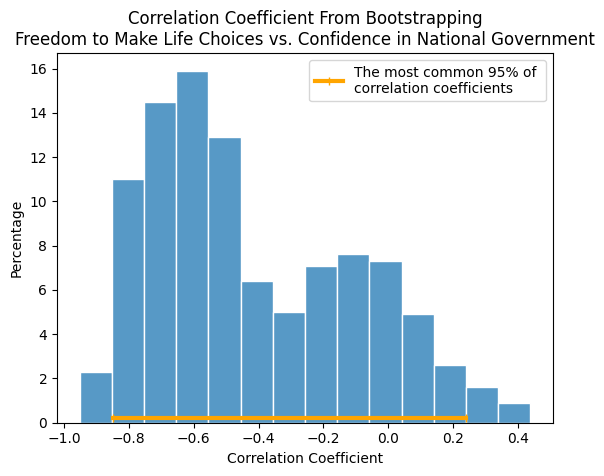

In [ ]:
#Visualize the confidence interval along with the data
sns.histplot(results_many_freedom, ec = "white", stat = 'percent')
plt.title("Correlation Coefficient From Bootstrapping\nFreedom to Make Life Choices vs. Confidence in National Government")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Percentage")
plt.plot([left_endpoint, right_endpoint], [0.2,0.2],
         color = "orange",
         linewidth = 3,
         zorder = 2,
         marker = '|',
         label = "The most common 95% of \ncorrelation coefficients")
plt.legend();

The confidence interval seems to be in line with what we were expecting, with it ranging from roughly -0.9 to a little over 0.2. This seems to imply that there is a weak to moderate negative relationship, on average, between freedom to make life choices and confidence in the national government.

###Interpretation from Results

After interpreting the graph, there seems to be a range from weak positive to a strong negative relationship between the freedom to make life choices and the confidence in the national government, which is strange to think about.

It would be normal to think that if there is a higher degree of freedom when it comes to life choices an individual can make, then it could be assumed that they would have a higher confidence in their government since the assumption can be made that if a government gives its citizens the freedom to decide their future, then the citizens' confidence in their government would, in turn, increase.

However, that is not the case here. One possible reason as to why the higher the freedom in life choices someone has, the lower their confidence in the government could be because someone may have once trusted in their government before and were disappointed or let down by the shortcomings of said government. Since then, that person has decided to put their future into their own hands and not at the hands of their government.

Since this data comes from the means of freedom to make life choices and confidence in the national government from all countries, we wanted to do a quick comparison between the United States and the United Kingdom.

To gain a deeper understanding of the results observed from the previous visualizations, we wanted to follow with two additional questions about two specific countries: the United States and the United Kingdom. For our first inquiry, we compared both countries' freedom to make life choices. For our second inquiry, we made a comparison between both countries' confidence in their respective national governments. We then visualized a trend via a line graph from 2006 to 2016.

### US vs. UK

In [ ]:
#Get UK stats
uk = new_world[new_world["country"] == "United Kingdom"]
uk[["year", "freedom_life_choices", "confidence_in_government"]]

,year,freedom_life_choices,confidence_in_government
1325,2005,0.922355,0.494750
1326,2007,0.838332,0.363638
1327,2008,0.759144,0.324166
1328,2009,0.816229,0.384067
1329,2010,0.841307,0.503511
1330,2011,0.899774,0.467890
1331,2012,0.888970,0.421262
1332,2013,0.905278,0.379232
1333,2014,0.857040,0.422672
1334,2015,0.832926,0.456812


In [ ]:
#Get US stats
us = new_world[new_world["country"] == "United States"]
us[["year", "freedom_life_choices", "confidence_in_government"]]

,year,freedom_life_choices,confidence_in_government
1336,2006,0.911496,0.558029
1337,2007,0.871904,0.393245
1338,2008,0.877956,0.379221
1339,2009,0.830684,0.503047
1340,2010,0.828044,0.418276
1341,2011,0.863202,0.382532
1342,2012,0.822662,0.348856
1343,2013,0.792256,0.288648
1344,2014,0.866077,0.348671
1345,2015,0.848753,0.346936


In [ ]:
#Combined both US and UK dataframes into one
combined = [us, uk]
us_and_uk = pd.concat(combined)
us_and_uk

,country,year,life_ladder,gdp_per_capita,social_support,life_expectancy_at_birth,freedom_life_choices,generosity,corruption_perception,positive_affect,negative_affect,confidence_in_government,democratic_quality,delivery_quality,standard_deviation_of_ladder_per_country_year,standard_deviation_mean_of_ladder_per_country_year,trustworthiness_of_others,continent
1336,United States,2006,7.181794,10.831686,0.964572,68.837296,0.911496,NaN,0.600309,0.827417,0.260511,0.558029,0.783720,1.534740,1.873673,0.260892,NaN,North America
1337,United States,2007,7.512688,10.839805,NaN,69.103119,0.871904,0.180463,0.633035,0.828503,0.231679,0.393245,0.730809,1.515519,1.723988,0.229477,NaN,North America
1338,United States,2008,7.280386,10.827426,0.952587,69.148506,0.877956,0.238272,0.668495,0.871968,0.226823,0.379221,0.840077,1.541801,1.778600,0.244300,NaN,North America
1339,United States,2009,7.158032,10.790511,0.911794,69.459709,0.830684,0.184664,0.665394,0.843484,0.261661,0.503047,0.756549,1.434897,2.021277,0.282379,0.370746,North America
1340,United States,2010,7.163616,10.807156,0.926159,69.593704,0.828044,0.227850,0.689583,0.860642,0.231053,0.418276,0.778588,1.468851,2.182074,0.304605,NaN,North America
1341,United States,2011,7.115139,10.815405,0.921705,69.682312,0.863202,0.144549,0.696926,0.836360,0.273379,0.382532,0.854799,1.457954,1.945976,0.273498,NaN,North America
1342,United States,2012,7.026227,10.829783,0.903192,69.770920,0.822662,0.198502,0.710034,0.833771,0.259644,0.348856,0.882691,1.444049,2.163160,0.307869,NaN,North America
1343,United States,2013,7.249285,10.837194,0.925397,69.859528,0.792256,0.257948,0.746894,0.813678,0.260328,0.288648,0.855374,1.393101,1.938088,0.267349,NaN,North America
1344,United States,2014,7.151114,10.853375,0.902097,69.948135,0.866077,0.205311,0.702267,0.834294,0.281265,0.348671,0.835329,1.416998,2.070654,0.289557,NaN,North America
1345,United States,2015,6.863947,10.869501,0.903571,70.036743,0.848753,0.203669,0.697543,0.813908,0.274688,0.346936,NaN,NaN,1.953670,0.284628,NaN,North America


#### Violin plot for Disparity Between US and UK

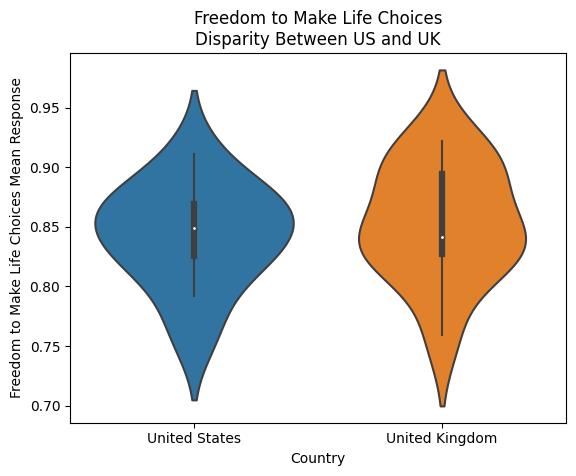

In [ ]:
#Here is a violinplot, displaying the disparity of responses for
#freedom to make life choices between US and UK.
sns.violinplot(data = us_and_uk, y = "freedom_life_choices", x = "country")
plt.xlabel("Country")
plt.ylabel("Freedom to Make Life Choices Mean Response")
plt.title("Freedom to Make Life Choices\nDisparity Between US and UK");

According to the violin plot, the United States seems to have a slightly higher mean positive response than the UK. And more people are congested around the middle at about 0.85 mark. The UK does have a slightly higher peak in positive response than the US. Both seem to have the same low point in negative responses.

#### US Vs. UK: Which country is truly more free?

For our first visualization, we wanted to make a comparison between the two countries based on the freedom to make life choices.

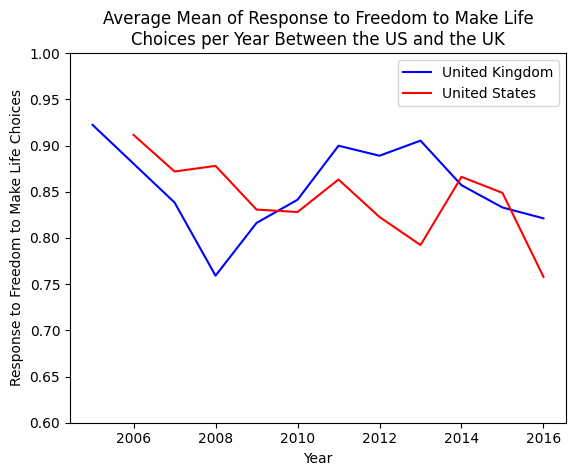

In [ ]:
#Plot the two countries' freedom variable
#I wanted to do a line graph since we are trying to discover trends over a period of time.
sns.lineplot(data = uk, x = uk["year"], y = uk["freedom_life_choices"], color = "blue", label = "United Kingdom")
sns.lineplot(data = us, x = us["year"], y = us["freedom_life_choices"], color = "red", label = "United States")
plt.xlabel('Year')
plt.ylabel('Response to Freedom to Make Life Choices')
plt.title("Average Mean of Response to Freedom to Make Life\nChoices per Year Between the US and the UK")
plt.ylim(0.6,1)
plt.legend();

The results are very interesting. We know that in 2008, the world hit a recession. According to the line graph, it seems that the UK was hit a lot harder than the US when it came to the global recession. That shouldn't come off as a big surprise since it can be assumed that the American economy, at that time, was wealthier and more powerful than the British economy.

Another interesting point that we discovered was a significant dip in freedom to make life choices in the United States in 2016. The 2016 presidential election and the controversies surrounding it may have amplified a perception of restriction on the freedom to make life choices. It is possible that the emphasis of certain domestic policies such as stronger border control in the United States could have factored into the sudden dip as to why people responded "No" to the freedom to make life choices question in 2016.

One final thing to point out is that while the UK had a significant sharp increase in the freedom to make life decisions factor, the US has had a somewhat steady decline in its citizens' freedom to make life choices. We don't exactly know why the UK would have such a sudden increase in freedom to make life choices, especially after such a hard-hitting recession for their country.

Unfortunately, with our data, 2016 was the most recent year that our dataset had. We would have loved to see what kind of discoveries we could have found if we had stats for up to the year 2022, especially considering what kind of effects the COVID-19 pandemic had on both countries.

#### US Vs. UK: Who is more confident in their government?

For our second visualization, we wanted to make a comparison between the two countries based on the confidence in the national governments.

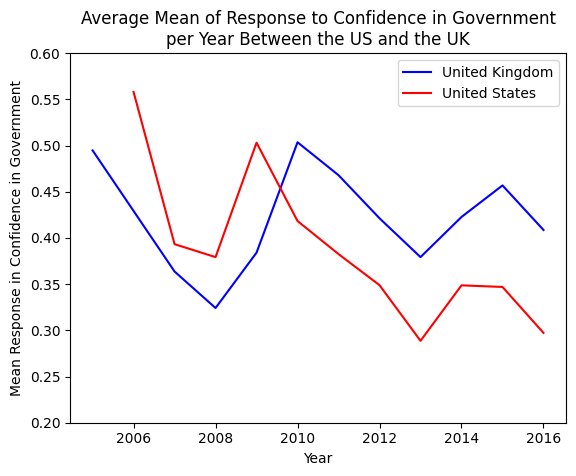

In [ ]:
#Plot the two countries' confidence variable
sns.lineplot(data = uk, x = uk["year"], y = uk["confidence_in_government"], color = "blue", label = "United Kingdom")
sns.lineplot(data = us, x = us["year"], y = us["confidence_in_government"], color = "red", label = "United States")
plt.title("Average Mean of Response to Confidence in Government\nper Year Between the US and the UK")
plt.xlabel("Year")
plt.ylabel("Mean Response in Confidence in Government")
plt.ylim(0.2,0.6)
plt.legend();

Both the UK and the US show similar patterns in trends for the confidence in national government. Both dipped in 2008 thanks to the global recession. Both seemed to spike back up around 2010 for reasons unknown. Then after 2010, both countries continued to dip.

One difference we see is that American citizens' confidence in their government has fallen harder than British citizens' confidence in their government.

As of 2016, it seems there is lower confidence in the American government than there is in the British government.

This lack of definitive evidence led us to the following question:


---
## Were people more or less happy throughout the course of this study?

In [ ]:
#Grab mean life ladder (for all countries) by year
life_ladder_mean = new_world.groupby("year")[["life_ladder"]].mean().rename(columns={"life_ladder":"mean_life_ladder"})
life_ladder_mean

,mean_life_ladder
year,
2005,6.446164
2006,5.196935
2007,5.418291
2008,5.418554
2009,5.457640
2010,5.496782
2011,5.424088
2012,5.443751
2013,5.394568


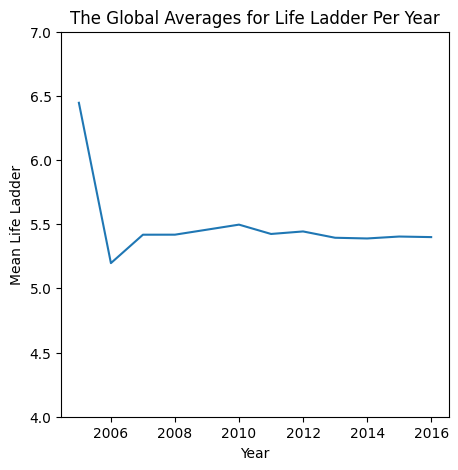

In [ ]:
#Plot
plt.figure(figsize=(5, 5))
sns.lineplot(data = life_ladder_mean, x = "year", y = "mean_life_ladder")
plt.ylim(4,7)
plt.xlabel("Year")
plt.ylabel("Mean Life Ladder")
plt.title("The Global Averages for Life Ladder Per Year");

This visualization allowed us to make an interesting observation. What happened in 2006 that resulted in such a dramatic decline in the life ladder, a.k.a. the happiness score?

Some of the most prominent headlines from this year included the execution of the Iraqi dictator Saddam Hussein, Pluto being downgraded from a plant to a dwarf planet, a Mumbai train bombing leaving 209 people dead, North Korea conducting their first nuclear test, wildlife conservation advocate Steve Erwin dies via stingray piercing, and many more. This was a year of great political and socioeconomic turmoil, which could be an explanation for why there was a sudden drop in the global life ladder.

In this study, there were a variety of metrics that went into measuring the life ladder. Here, we narrowed our focus to specific factors that we thought to have more influence on the outcome of the life ladder than others.

The following questions helped us paint a better picture of how the observations in this study interact with each other.

---
## 3. If confidence in the government and the freedom to make life choices do not have a noticeable impact on happiness, would the average GDP per capita have a direct relationship with  perceived happiness (life ladder), specifically of the two largest continents (Asia and North America)?

In [ ]:
asia_countries = new_world[new_world["continent"] == "Asia"]
north_america_countries = new_world[new_world["continent"] == "North America"]

#GDP per capita for each country in Asia from 2006-2016
gdp_per_capita_asia = asia_countries.groupby("country")[["gdp_per_capita"]].mean().reset_index()
gdp_per_capita_asia_sorted = gdp_per_capita_asia.sort_values("gdp_per_capita")

#GDP per capita for each country in North America from 2006-2016
gdp_per_capita_north_america = north_america_countries.groupby("country")[["gdp_per_capita"]].mean().reset_index()
gdp_per_capita_north_america_sorted = gdp_per_capita_north_america.sort_values("gdp_per_capita")

#Life ladder for each country in Asia from 2006-2016
life_ladder_asia = asia_countries.groupby("country")[["life_ladder"]].mean().reset_index()
life_ladder_asia_sorted = life_ladder_asia.sort_values("life_ladder")

#Life ladder for each country in North America from 2006-2016
life_ladder_north_america = north_america_countries.groupby("country")[["life_ladder"]].mean().reset_index()
life_ladder_north_america_sorted = life_ladder_north_america.sort_values("life_ladder")

#Showing all Asia and North America countries + stats
asia_north_america = new_world[(new_world["continent"] == "Asia") | (new_world["continent"] == "North America")]
asia_north_america

,country,year,life_ladder,gdp_per_capita,social_support,life_expectancy_at_birth,freedom_life_choices,generosity,corruption_perception,positive_affect,negative_affect,confidence_in_government,democratic_quality,delivery_quality,standard_deviation_of_ladder_per_country_year,standard_deviation_mean_of_ladder_per_country_year,trustworthiness_of_others,continent
0,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,0.517637,0.258195,0.612072,-1.962724,-1.665877,1.774662,0.476600,NaN,Asia
1,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,0.583926,0.237092,0.611545,-2.082451,-1.647945,1.722688,0.391362,0.286315,Asia
2,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,0.618265,0.275324,0.299357,-2.015700,-1.630097,1.878622,0.394803,0.275833,Asia
3,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,0.611387,0.267175,0.307386,-1.943686,-1.620443,1.785360,0.465942,NaN,Asia
4,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,0.710385,0.267919,0.435440,-1.855898,-1.435541,1.798283,0.475367,NaN,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,Yemen,2012,4.060601,8.191209,0.681678,53.432404,0.705815,-0.171647,0.793233,0.501776,0.262817,0.598435,-1.897945,-1.116894,2.228805,0.548885,NaN,Asia
1395,Yemen,2013,4.217679,8.206121,0.693905,53.648590,0.542547,-0.180675,0.885197,0.558500,0.265685,0.387677,-1.851995,-1.074408,2.295311,0.544212,NaN,Asia
1396,Yemen,2014,3.967958,8.286581,0.638252,53.846603,0.663909,-0.174245,0.885429,0.610585,0.275674,0.344929,-1.931368,-1.243065,2.438403,0.614523,NaN,Asia
1397,Yemen,2015,2.982674,7.843260,0.668683,54.044617,0.609981,-0.139964,0.829098,0.507435,0.321357,0.263297,NaN,NaN,2.194034,0.735593,NaN,Asia


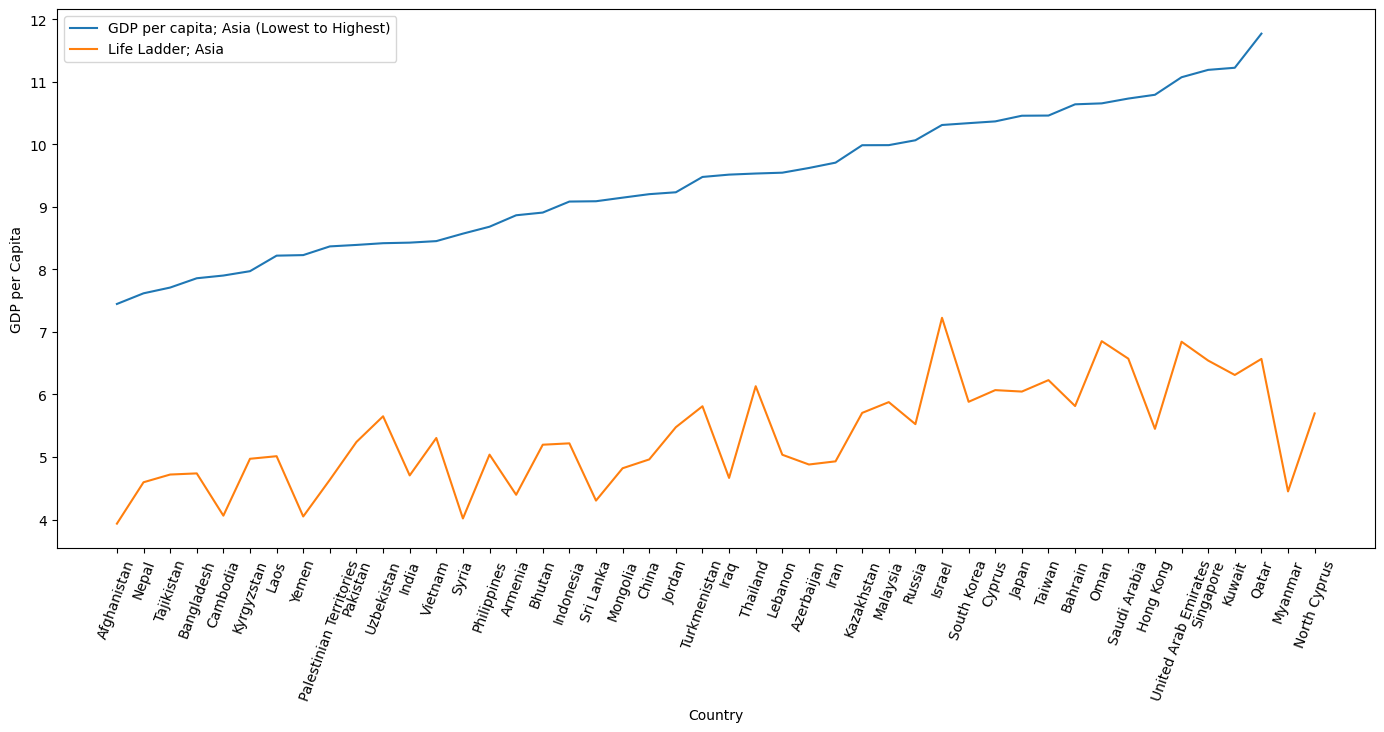

In [ ]:
plt.figure(figsize=(17,7))
plt.xticks(rotation = 70)
sns.lineplot(data = gdp_per_capita_asia_sorted, x = "country", y = "gdp_per_capita", label = "GDP per capita; Asia (Lowest to Highest)")
sns.lineplot(data = life_ladder_asia_sorted, x = "country", y = "life_ladder", label = "Life Ladder; Asia")
plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.legend();

In [ ]:
asia_corr = asia_countries.corr()
asia_corr.loc["life_ladder"]["gdp_per_capita"]

<ipython-input-131-f2664f86d3bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  asia_corr = asia_countries.corr()


0.7423476683245546

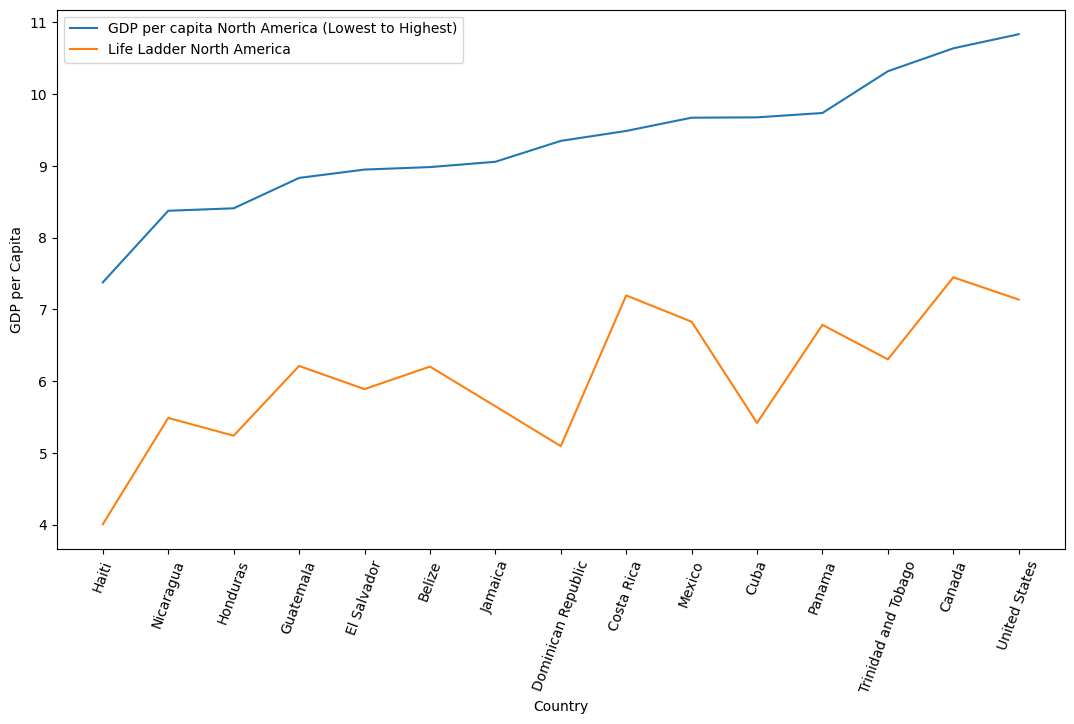

In [ ]:
plt.figure(figsize=(13,7))
plt.xticks(rotation = 70)
sns.lineplot(data = gdp_per_capita_north_america_sorted, x = "country", y = "gdp_per_capita", label = "GDP per capita North America (Lowest to Highest)")
sns.lineplot(data = life_ladder_north_america_sorted, x = "country", y = "life_ladder", label = "Life Ladder North America")
plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.legend();

In [ ]:
north_america_corr = north_america_countries.corr(numeric_only = True)
north_america_corr.loc["life_ladder"]["gdp_per_capita"]

0.7911013059187362

In the two graphs, we split the Asian countries and the North American countries and compared both their GDP per capita and Life Ladder. The correlation for the Asian countries is 0.7423 and the North American countries is 0.7911. These are both strong correlations and are considered to have strong relationships between GDP per capita and life ladder. But if we look at the graph we can see for North America, the lowest life ladder is for Haiti. During 2010, Haiti experienced one of the worst earthquakes, with a total death count of around 300,000. For Asia we see Afghanistan with one of the worst life ladders. There is a high likelihood that this is due to the Afghanistan War, with deaths in the near 240,000 range. It was also during this time that Afghanistan had its deadliest year in 2010.

After analyzing the information from the visualizations, we found that both Israel and Canada have the highest ranked life ladder between Asia and North America. Next, we looked deeper into this relationship.

So let's take the two happiest countries based on the previous graphs.

In [ ]:
israel = new_world[new_world["country"] == "Israel"]
canada = new_world[new_world["country"] == "Canada"]

###Is generosity higher for Israel or Canada? And is it associated with life ladder (happiness)?

Null Hypothesis: There is no association between generosity and life ladder.

Alternate Hypothesis: There is an association between generosity and life ladder.

In [ ]:
observed_test_statistic_diff_mean_generosity = israel["generosity"].mean() - canada["generosity"].mean()
observed_test_statistic_diff_mean_generosity

-0.10277685387272728

So since we did Israel's generosity - Canada's generosity and got a negative number, this means Canada shows more generosity on average than Israel. Now let's start shuffing the generosity column.

In [ ]:
israel_canada = new_world[(new_world["country"] == "Israel") | (new_world["country"] == "Canada")].copy()
israel_canada["generosity_shuffled"] = np.random.permutation(israel_canada["generosity"])
israel_canada

,country,year,life_ladder,gdp_per_capita,social_support,life_expectancy_at_birth,freedom_life_choices,generosity,corruption_perception,positive_affect,negative_affect,confidence_in_government,democratic_quality,delivery_quality,standard_deviation_of_ladder_per_country_year,standard_deviation_mean_of_ladder_per_country_year,trustworthiness_of_others,continent,generosity_shuffled
216,Canada,2005,7.418048,10.608347,0.961552,70.500893,0.957306,0.237726,0.502681,0.838544,0.233278,0.442818,1.143131,1.748179,1.636804,0.220652,NaN,North America,0.164200
217,Canada,2007,7.481753,10.636994,NaN,70.800926,0.930341,0.234963,0.405608,0.871604,0.256810,0.637824,1.184436,1.782437,1.817371,0.242907,NaN,North America,0.142283
218,Canada,2008,7.485604,10.636126,0.938707,70.968613,0.926315,0.247080,0.369588,0.890220,0.202175,0.590371,1.219964,1.803044,1.615553,0.215821,NaN,North America,0.238489
219,Canada,2009,7.487824,10.594738,0.942845,71.219818,0.915058,0.232029,0.412622,0.867433,0.247633,0.608264,1.262603,1.835038,1.612508,0.215351,0.418870,North America,0.132811
220,Canada,2010,7.650346,10.613968,0.953765,71.484520,0.933949,0.216130,0.412660,0.878868,0.233113,0.551076,1.139744,1.846439,1.749785,0.228720,NaN,North America,0.216130
221,Canada,2011,7.426054,10.635020,0.921669,71.428650,0.950925,0.238688,0.432992,0.881385,0.247729,0.553291,1.233397,1.801797,1.819456,0.245010,NaN,North America,0.237726
222,Canada,2012,7.415144,10.640494,0.948128,71.615799,0.917961,0.275591,0.465602,0.856704,0.229332,0.523448,1.266734,1.781211,1.772709,0.239066,NaN,North America,0.196097
223,Canada,2013,7.593794,10.650873,0.936239,71.793701,0.916014,0.301298,0.406236,0.851297,0.262850,0.505976,1.244149,1.775885,1.658059,0.218344,NaN,North America,0.086205
224,Canada,2014,7.304258,10.664321,0.917836,71.961899,0.938898,0.255754,0.441735,0.833404,0.258602,0.516954,1.304014,1.825235,1.759426,0.240877,NaN,North America,0.247080
225,Canada,2015,7.412773,10.666414,0.939067,72.130104,0.931469,0.238489,0.427152,0.845328,0.286280,0.644104,NaN,NaN,1.611454,0.217389,NaN,North America,NaN


Splitting the two countries again and grabbing the difference in means.

In [ ]:
israel_after_shuffling = israel_canada[israel_canada["country"] == "Israel"]
canada_after_shuffling = israel_canada[israel_canada["country"] == "Canada"]

difference_in_means = israel_after_shuffling["generosity_shuffled"].mean() - canada_after_shuffling["generosity_shuffled"].mean()
difference_in_means

0.03424425744545456

Now building the Empirical Distribution.

In [ ]:
num_iterations = 10000
many_diffs_in_mean_generosity_after_shuffling = np.array([])

for i in range(num_iterations):
    israel_canada["generosity_shuffled"] = np.random.permutation(israel_canada["generosity"])

    israel_after_shuffling = israel_canada[israel_canada["country"] == "Israel"]
    canada_after_shuffling = israel_canada[israel_canada["country"] == "Canada"]

    difference_in_means = israel_after_shuffling["generosity_shuffled"].mean() - canada_after_shuffling["generosity_shuffled"].mean()
    many_diffs_in_mean_generosity_after_shuffling = np.append(many_diffs_in_mean_generosity_after_shuffling, difference_in_means)

many_diffs_in_mean_generosity_after_shuffling

array([-0.02398699,  0.0327656 , -0.01618163, ...,  0.04522149,
       -0.00467934, -0.02525281])

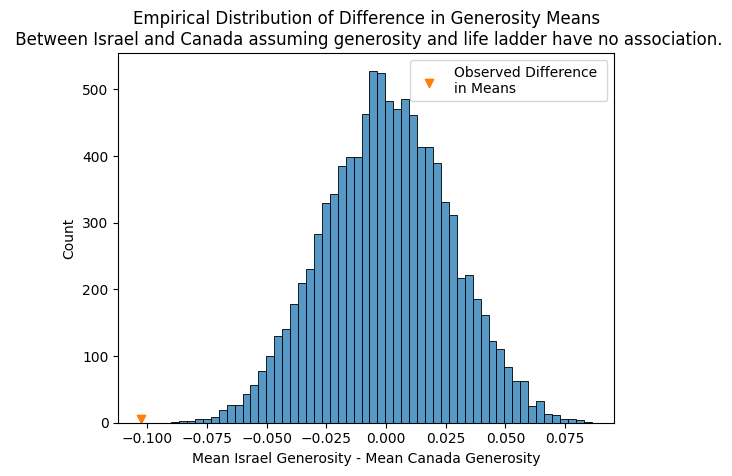

In [ ]:
sns.histplot(many_diffs_in_mean_generosity_after_shuffling)
plt.scatter(observed_test_statistic_diff_mean_generosity, y = 6, marker= 'v', label='Observed Difference \nin Means')
plt.title(f"Empirical Distribution of Difference in Generosity Means\n Between Israel and Canada assuming generosity and life ladder have no association.")
plt.xlabel("Mean Israel Generosity - Mean Canada Generosity")
plt.legend();

As we can see, the graph shows that there is an association between generosity and life ladder scores, so we reject the null. So as much as we said that GDP per capita correlates with life ladder, it seems so does generosity. Now that we understand generosity plays a big factor, what happened during this time period? Well Canada is known for being peaceful with different countries, which helps with its overall happiness. As for Israel, a likely indication as to why they are ranked higher for life ladder is that they are a country "driven by family and community connections".

---
## If confidence in the government and the freedom to make life choices do not have a noticeable impact on happiness, would the average GDP per capita have a direct relationship with  perceived happiness (life ladder), specifically of the two largest continents (Asia and North America)?

In [ ]:
asia_countries = new_world[new_world["continent"] == "Asia"]
north_america_countries = new_world[new_world["continent"] == "North America"]

#GDP per capita for each country in Asia from 2006-2016
gdp_per_capita_asia = asia_countries.groupby("country")[["gdp_per_capita"]].mean().reset_index()
gdp_per_capita_asia_sorted = gdp_per_capita_asia.sort_values("gdp_per_capita")

#GDP per capita for each country in North America from 2006-2016
gdp_per_capita_north_america = north_america_countries.groupby("country")[["gdp_per_capita"]].mean().reset_index()
gdp_per_capita_north_america_sorted = gdp_per_capita_north_america.sort_values("gdp_per_capita")

#Life ladder for each country in Asia from 2006-2016
life_ladder_asia = asia_countries.groupby("country")[["life_ladder"]].mean().reset_index()
life_ladder_asia_sorted = life_ladder_asia.sort_values("life_ladder")

#Life ladder for each country in North America from 2006-2016
life_ladder_north_america = north_america_countries.groupby("country")[["life_ladder"]].mean().reset_index()
life_ladder_north_america_sorted = life_ladder_north_america.sort_values("life_ladder")

#Showing all Asia and North America countries + stats
asia_north_america = new_world[(new_world["continent"] == "Asia") | (new_world["continent"] == "North America")]
asia_north_america

,country,year,life_ladder,gdp_per_capita,social_support,life_expectancy_at_birth,freedom_life_choices,generosity,corruption_perception,positive_affect,negative_affect,confidence_in_government,democratic_quality,delivery_quality,standard_deviation_of_ladder_per_country_year,standard_deviation_mean_of_ladder_per_country_year,trustworthiness_of_others,continent
0,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,0.517637,0.258195,0.612072,-1.962724,-1.665877,1.774662,0.476600,NaN,Asia
1,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,0.583926,0.237092,0.611545,-2.082451,-1.647945,1.722688,0.391362,0.286315,Asia
2,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,0.618265,0.275324,0.299357,-2.015700,-1.630097,1.878622,0.394803,0.275833,Asia
3,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,0.611387,0.267175,0.307386,-1.943686,-1.620443,1.785360,0.465942,NaN,Asia
4,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,0.710385,0.267919,0.435440,-1.855898,-1.435541,1.798283,0.475367,NaN,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,Yemen,2012,4.060601,8.191209,0.681678,53.432404,0.705815,-0.171647,0.793233,0.501776,0.262817,0.598435,-1.897945,-1.116894,2.228805,0.548885,NaN,Asia
1395,Yemen,2013,4.217679,8.206121,0.693905,53.648590,0.542547,-0.180675,0.885197,0.558500,0.265685,0.387677,-1.851995,-1.074408,2.295311,0.544212,NaN,Asia
1396,Yemen,2014,3.967958,8.286581,0.638252,53.846603,0.663909,-0.174245,0.885429,0.610585,0.275674,0.344929,-1.931368,-1.243065,2.438403,0.614523,NaN,Asia
1397,Yemen,2015,2.982674,7.843260,0.668683,54.044617,0.609981,-0.139964,0.829098,0.507435,0.321357,0.263297,NaN,NaN,2.194034,0.735593,NaN,Asia


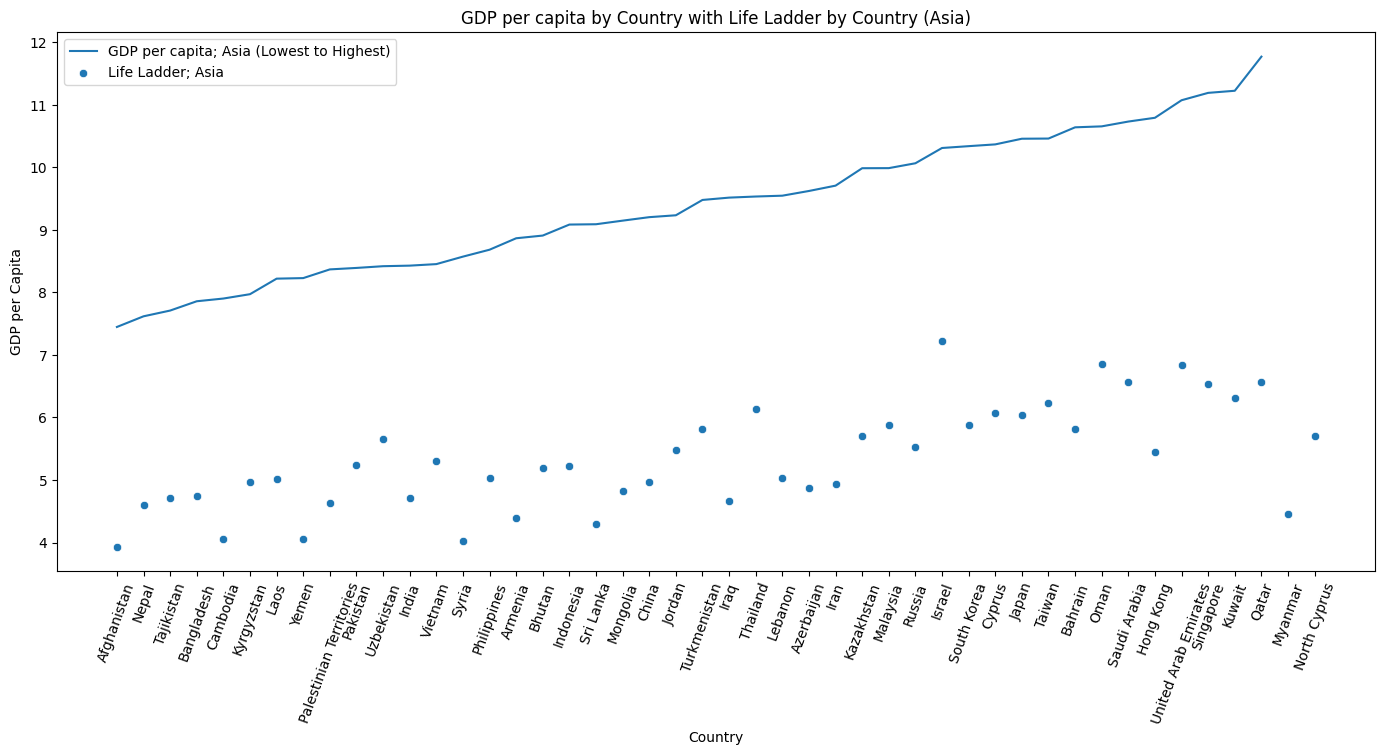

In [ ]:
#Plotting Asia GDP per Capita and their life ladder
plt.figure(figsize=(17,7))
plt.xticks(rotation = 70)
sns.lineplot(data = gdp_per_capita_asia_sorted, x = "country", y = "gdp_per_capita", label = "GDP per capita; Asia (Lowest to Highest)")
sns.scatterplot(data = life_ladder_asia_sorted, x = "country", y = "life_ladder", label = "Life Ladder; Asia")
plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.title("GDP per capita by Country with Life Ladder by Country (Asia)")
plt.legend();

In [ ]:
#Correlation between life_ladder and gdp_per_Capita with Asia
asia_corr = asia_countries.corr(numeric_only = True)
asia_corr.loc["life_ladder"]["gdp_per_capita"]

0.7423476683245546

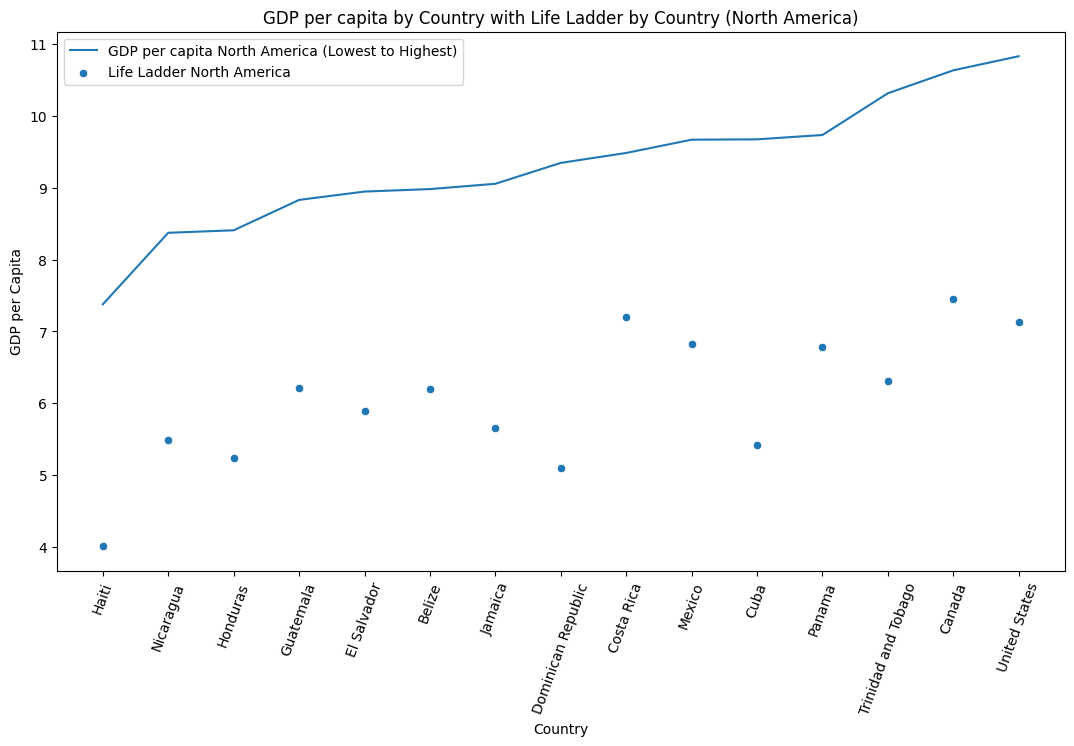

In [ ]:
#Plotting North America GDP per Capita and their life ladder
plt.figure(figsize=(13,7))
plt.xticks(rotation = 70)
sns.lineplot(data = gdp_per_capita_north_america_sorted, x = "country", y = "gdp_per_capita", label = "GDP per capita North America (Lowest to Highest)")
sns.scatterplot(data = life_ladder_north_america_sorted, x = "country", y = "life_ladder", label = "Life Ladder North America")
plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.title("GDP per capita by Country with Life Ladder by Country (North America)")
plt.legend();

In [ ]:
#Correlation between life_ladder and gdp_per_Capita with North America
north_america_corr = north_america_countries.corr(numeric_only = True)
north_america_corr.loc["life_ladder"]["gdp_per_capita"]

0.7911013059187362

In the two graphs, we split the Asian countries and the North American countries and compared both their GDP per capita and Life Ladder. The correlation for the Asian countries is 0.7423 and the North American countries is 0.7911. These are both strong correlations and are considered to have very strong relationships between GDP per capita and life ladder. But if we look at the graph we can see for North America, the lowest life ladder is for Haiti. During 2010, Haiti experienced one of the worst earthquakes, with a total death count of around 300,000. For Asia we see Afghanistan with one of the worst life ladders. This is most definitely due to the Afghanistan War, with deaths in the near 240,000 range. It was also during this time that Afghanistan had its deadliest year in 2010.

But with the lowest life ladder we have the highest life ladder. Both Israel and Canada have the highest ranked life ladder between Asia and North America so let's dive deeper into that.

So let's take the two happiest countries based on the previous graphs.

In [ ]:
#Creating tables for just Israel and Canada
israel = new_world[new_world["country"] == "Israel"]
canada = new_world[new_world["country"] == "Canada"]

Is generosity higher for Israel or Canada? And is it associated with life ladder (happiness)?

Null Hypothesis: There is no association between generosity and life ladder.

Alternate Hypothesis: There is an association between generosity and life ladder.

In [ ]:
#Israel mean generosity - Canada mean generosity
observed_test_statistic_diff_mean_generosity = israel["generosity"].mean() - canada["generosity"].mean()
observed_test_statistic_diff_mean_generosity

-0.10277685387272728

So since we did Israel's generosity - Canada's generosity and got a negative number, this means Canada shows more generosity on average than Israel. Now let's start shuffing the generosity column.

In [ ]:
#Table of Israel and Canada only
israel_canada = new_world[(new_world["country"] == "Israel") | (new_world["country"] == "Canada")].copy()
israel_canada["generosity_shuffled"] = np.random.permutation(israel_canada["generosity"])
israel_canada

,country,year,life_ladder,gdp_per_capita,social_support,life_expectancy_at_birth,freedom_life_choices,generosity,corruption_perception,positive_affect,negative_affect,confidence_in_government,democratic_quality,delivery_quality,standard_deviation_of_ladder_per_country_year,standard_deviation_mean_of_ladder_per_country_year,trustworthiness_of_others,continent,generosity_shuffled
216,Canada,2005,7.418048,10.608347,0.961552,70.500893,0.957306,0.237726,0.502681,0.838544,0.233278,0.442818,1.143131,1.748179,1.636804,0.220652,NaN,North America,NaN
217,Canada,2007,7.481753,10.636994,NaN,70.800926,0.930341,0.234963,0.405608,0.871604,0.256810,0.637824,1.184436,1.782437,1.817371,0.242907,NaN,North America,0.100960
218,Canada,2008,7.485604,10.636126,0.938707,70.968613,0.926315,0.247080,0.369588,0.890220,0.202175,0.590371,1.219964,1.803044,1.615553,0.215821,NaN,North America,0.196097
219,Canada,2009,7.487824,10.594738,0.942845,71.219818,0.915058,0.232029,0.412622,0.867433,0.247633,0.608264,1.262603,1.835038,1.612508,0.215351,0.418870,North America,0.132811
220,Canada,2010,7.650346,10.613968,0.953765,71.484520,0.933949,0.216130,0.412660,0.878868,0.233113,0.551076,1.139744,1.846439,1.749785,0.228720,NaN,North America,0.131294
221,Canada,2011,7.426054,10.635020,0.921669,71.428650,0.950925,0.238688,0.432992,0.881385,0.247729,0.553291,1.233397,1.801797,1.819456,0.245010,NaN,North America,0.216130
222,Canada,2012,7.415144,10.640494,0.948128,71.615799,0.917961,0.275591,0.465602,0.856704,0.229332,0.523448,1.266734,1.781211,1.772709,0.239066,NaN,North America,0.142283
223,Canada,2013,7.593794,10.650873,0.936239,71.793701,0.916014,0.301298,0.406236,0.851297,0.262850,0.505976,1.244149,1.775885,1.658059,0.218344,NaN,North America,0.164200
224,Canada,2014,7.304258,10.664321,0.917836,71.961899,0.938898,0.255754,0.441735,0.833404,0.258602,0.516954,1.304014,1.825235,1.759426,0.240877,NaN,North America,0.275591
225,Canada,2015,7.412773,10.666414,0.939067,72.130104,0.931469,0.238489,0.427152,0.845328,0.286280,0.644104,NaN,NaN,1.611454,0.217389,NaN,North America,0.142222


Splitting the two countries again and grabbing the difference in means.

In [ ]:
#One shuffle between generosity and Israel generosity mean - Canada generosity mean
israel_after_shuffling = israel_canada[israel_canada["country"] == "Israel"]
canada_after_shuffling = israel_canada[israel_canada["country"] == "Canada"]

difference_in_means = israel_after_shuffling["generosity_shuffled"].mean() - canada_after_shuffling["generosity_shuffled"].mean()
difference_in_means

0.026435122800000016

Now building the Empirical Distribution.

In [ ]:
#Building empirical distribution with different means in generosity as results
num_iterations = 10000
many_diffs_in_mean_generosity_after_shuffling = np.array([])

for i in range(num_iterations):
    israel_canada["generosity_shuffled"] = np.random.permutation(israel_canada["generosity"])

    israel_after_shuffling = israel_canada[israel_canada["country"] == "Israel"]
    canada_after_shuffling = israel_canada[israel_canada["country"] == "Canada"]

    difference_in_means = israel_after_shuffling["generosity_shuffled"].mean() - canada_after_shuffling["generosity_shuffled"].mean()
    many_diffs_in_mean_generosity_after_shuffling = np.append(many_diffs_in_mean_generosity_after_shuffling, difference_in_means)

many_diffs_in_mean_generosity_after_shuffling;

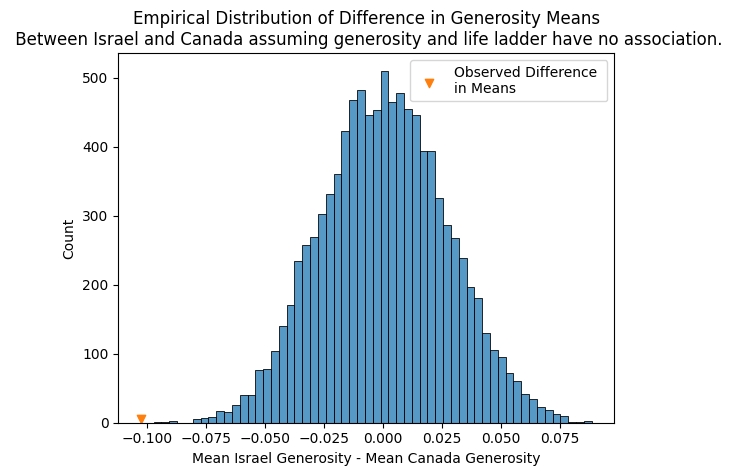

In [ ]:
#Plotting many results of difference in means
sns.histplot(many_diffs_in_mean_generosity_after_shuffling)
plt.scatter(observed_test_statistic_diff_mean_generosity, y = 6, marker= 'v', label='Observed Difference \nin Means')
plt.title(f"Empirical Distribution of Difference in Generosity Means\n Between Israel and Canada assuming generosity and life ladder have no association.")
plt.xlabel("Mean Israel Generosity - Mean Canada Generosity")
plt.legend();

In [ ]:
#P-value
np.count_nonzero((many_diffs_in_mean_generosity_after_shuffling <= observed_test_statistic_diff_mean_generosity))

0

As we can see, the graph shows that there is an association between generosity and life ladder scores, so we reject the null. We see this in the tiny p-value that we have so this implies that we have evidence against the null hypothesis. So as much as we said that GDP per capita correlates with life ladder, it seems so does generosity. Now that we understand generosity plays a big factor, what happened during this time period? Well Canada is known for being peaceful with different countries, which helps with its overall happiness. As for Israel, they are ranked really high for life ladder because they are a country "driven by family and community connections".

So we understand that generosity plays a big part into life ladder, and a higher GDP correlates to a high life ladder. Does a high GDP lead to other high statistics?

---
## As the GDP per capita increases, does healthy life expectancy at birth increase as well?

###Closer look at GDP per capita of each country:

In [ ]:
#GDP per capita
gdp_per_capita_countries = new_world.groupby("country")[["gdp_per_capita"]].mean().rename(columns={"gdp_per_capita": "Mean Log GDP per capita 2008-2016"}).reset_index()
gdp_per_capita_countries

,country,Mean Log GDP per capita 2008-2016
0,Afghanistan,7.447978
1,Albania,9.172559
2,Algeria,9.498361
3,Angola,8.816016
4,Argentina,9.658498
...,...,...
159,Venezuela,9.706945
160,Vietnam,8.453304
161,Yemen,8.229635
162,Zambia,8.080556


### A closer look at life expectancy at birth of each country:

In [ ]:
#Life expectancy at birth 2008-2016
life_expectancy_countries = new_world.groupby("country")[["life_expectancy_at_birth"]].mean().rename(columns={"life_expectancy_at_birth": "Mean Healthy life expectancy at birth 2008-2016"}).reset_index()
life_expectancy_countries

,country,Mean Healthy life expectancy at birth 2008-2016
0,Afghanistan,48.727537
1,Albania,67.999568
2,Algeria,64.117065
3,Angola,44.572942
4,Argentina,66.701826
...,...,...
159,Venezuela,64.121524
160,Vietnam,65.254677
161,Yemen,53.374862
162,Zambia,48.995142


###Plotting

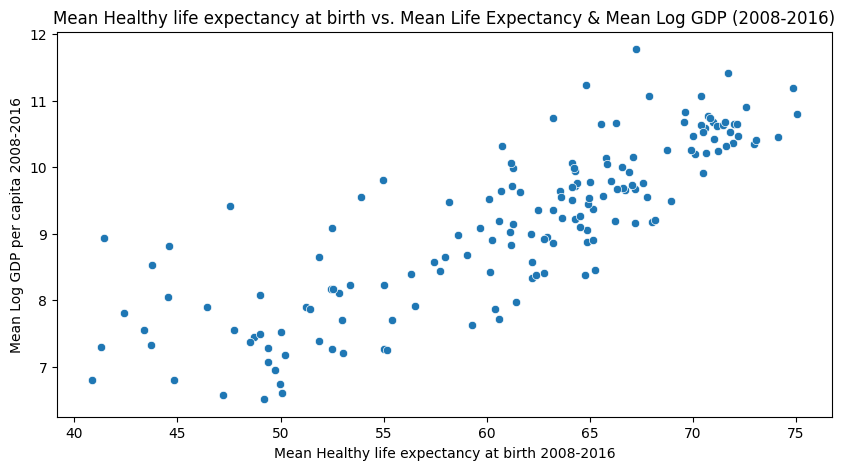

In [ ]:
#Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x = life_expectancy_countries["Mean Healthy life expectancy at birth 2008-2016"], y = gdp_per_capita_countries["Mean Log GDP per capita 2008-2016"])
plt.title('Mean Healthy life expectancy at birth vs. Mean Life Expectancy & Mean Log GDP (2008-2016)');

From the visualization above, we can see that there is a noticeable positive trend from 2008 to 2016 between the mean healthy life expectancy at birth and the mean log GDP per capita.

---
## 3. Results

### Correlation Between Freedom to Make Life Choices and Confidence in National Government

The correlation analysis between freedom to make life choices and confidence in the national government revealed a moderate positive relationship (correlation coefficient: 0.2272). To ensure the reliability of this result, bootstrapping was conducted, yielding a 95% confidence interval between -0.8625 and 0.2272. This suggests a weak to moderate negative relationship, on average, between freedom to make life choices and confidence in the national government.

### Comparison Between the United States and the United Kingdom
Freedom to Make Life Choices:

A violin plot comparing the freedom to make life choices in the United States and the United Kingdom indicated a slightly higher mean positive response in the United States, with both countries showing a similar distribution.

Confidence in Government:

The line graph comparing the confidence in government between the two countries revealed that, despite fluctuations, both the United States and the United Kingdom experienced a decline in confidence after 2010. The United States displayed a more significant decrease, resulting in lower confidence compared to the United Kingdom as of 2016.

### Overall Happiness Trends Over Time

A line graph depicting the global average life ladder from 2005 to 2016 showed a notable decline in 2006, attributed to significant political and socioeconomic events. The global life ladder gradually recovered in subsequent years.

### Relationship Between GDP per Capita and Happiness
Asia and North America:

Separate analyses for Asia and North America revealed strong positive correlations between GDP per capita and life ladder (Asia: 0.7423, North America: 0.7911). However, outliers such as Haiti and Afghanistan were observed, indicating that other factors contribute to happiness.



Israel and Canada:

The two countries with the highest life ladder scores, Israel and Canada, were analyzed for generosity. While Canada exhibited higher average generosity, permutation tests indicated a statistically significant association between generosity and life ladder.

---

## 4. Conclusion

### Freedom and Confidence in Government
The relationship between freedom to make life choices and confidence in the national government is nuanced. Contrary to expectations, higher freedom does not necessarily lead to greater confidence, suggesting that factors beyond personal freedom influence government trust.

### US vs. UK
Both the United States and the United Kingdom experienced a decline in confidence in their governments, with the United States showing a more pronounced decrease. The reasons for these trends warrant further investigation, possibly influenced by political events and policies.

### Global Happiness Trends
The decline in global happiness in 2006 can be attributed to significant global events. However, subsequent recovery suggests resilience in the face of challenges, highlighting the dynamic nature of global happiness.

### GDP per Capita and Happiness
Strong positive correlations between GDP per capita and life ladder in Asia and North America indicate a general trend, but outliers emphasize the role of other hidden factors that influence these observations. Generosity was identified as a significant factor in the happiness of countries like Israel and Canada.

### Summary
While economic factors contribute to happiness, social and political aspects, as well as individual characteristics like generosity, play crucial roles. Understanding the interconnectedness of these variables provides a more thorough understanding on global happiness scores.